<a href="https://colab.research.google.com/github/Chathuraje/crypto-predict-ai/blob/main/Crypto_Predict_AI_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations

In [ ]:
pip install yfinance

In [ ]:
pip install mwclient

In [ ]:
pip install transformers

In [ ]:
pip install statistics

# **Collect Crypto Data From yfinane**
##### The code above is written in Python and it is used to collect historical data for Bitcoin (BTC) using the yfinance library.It starts by importing the required libraries, which are yfinance and pandas. Then, it defines the ticker for Bitcoin, which is "BTC-USD". After that, it uses the yfinance library to collect the historical data for the ticker and stores it in a variable called "btc". The code then converts the index of the data to a datetime format and removes two unwanted columns from the data. The code then converts the names of the columns to lower case and plots the close price over time using the "plot.line" method. Finally, it saves the data to a csv file on the disk.
---

In [ ]:
# Import required libraries

import yfinance as yf
import os
import pandas as pd

In [ ]:
# Define the ticker for Bitcoin
btc_ticker = yf.Ticker("BTC-USD")

In [ ]:
# Collect the historical data for the ticker
btc = btc_ticker.history(period="max")

In [ ]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-08 00:00:00+00:00,23263.416016,23367.958984,22731.097656,22939.398438,25371367758,0.0,0.0
2023-02-09 00:00:00+00:00,22946.566406,22996.437500,21773.974609,21819.039062,32572572185,0.0,0.0
2023-02-10 00:00:00+00:00,21819.005859,21941.185547,21539.392578,21651.183594,27078406594,0.0,0.0


In [ ]:
# Convert the index of the data to datetime format
btc.index = pd.to_datetime(btc.index)
btc.index = btc.index.tz_localize(None)

In [ ]:
# Remove unwanted columns from the data
del btc["Dividends"]
del btc["Stock Splits"]

In [ ]:
# Convert the column names to lower case
btc.columns = [c.lower() for c in btc.columns]

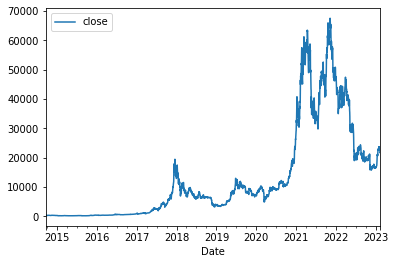

In [ ]:
# Plot the close price over time
btc.plot.line(y="close", use_index=True)

In [ ]:
# Save the data to a csv file
btc.to_csv("/content/drive/MyDrive/Colab Notebooks/Data/Crypto Predict AI - v01/btc_data.csv")

# **Collect Wikipedia Revison data for sentiment analyze**

##### The following code is used to collect revision data from the English Wikipedia page for Bitcoin and then analyze the sentiment of the comments accompanying each revision. The sentiment analysis is performed using the sentiment-analysis model from the Transformers library. The sentiment score for each day is calculated as the mean sentiment score for the comments of all revisions made on that day. The final result is stored in a CSV file.
---



In [ ]:
# Import required libraries
import mwclient
import time

# Connect to the English Wikipedia site
site = mwclient.Site("en.wikipedia.org")
page = site.pages["Bitcoin"]

In [ ]:
# Retrieve all revisions of the Bitcoin page
revs = list(page.revisions())

In [ ]:
revs[0]

OrderedDict([('revid', 1138230231),
             ('parentid', 1136456955),
             ('user', 'Blockchainus Maximus'),
             ('timestamp',
              time.struct_time(tm_year=2023, tm_mon=2, tm_mday=8, tm_hour=17, tm_min=10, tm_sec=32, tm_wday=2, tm_yday=39, tm_isdst=-1)),
             ('comment', 'proportion adjustment and logo title')])

In [ ]:
# Sort the revisions based on their timestamp
revs = sorted(revs, key=lambda rev: rev["timestamp"]) 

In [ ]:
from transformers import pipeline

# Load the sentiment analysis model from Hugging Face Transformers
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
# Function to find the sentiment of a text
def find_sentiment(text):
    sent = sentiment_pipeline([text[:250]])[0]
    score = sent["score"]
    if sent["label"] == "NEGATIVE":
        score *= -1
    return score

In [ ]:
find_sentiment("I feel neutral about you")

-0.9937905669212341

In [ ]:
# Dictionary to store the sentiment data
edits = {}

In [ ]:
# Loop through each revision
for rev in revs:        
  # Extract the date of the revision
  date = time.strftime("%Y-%m-%d", rev["timestamp"])

  # Initialize an entry for the date in the dictionary, if one does not exist
  if date not in edits:
    edits[date] = dict(sentiments=list(), edit_count=0)

    # Increment the edit count for the date
    edits[date]["edit_count"] += 1
        
    # Extract the comment accompanying the revision
    comment = rev.get("comment", "")

    # Add the sentiment score of the comment to the dictionary
    edits[date]["sentiments"].append(find_sentiment(comment))

In [ ]:
from statistics import mean

# Calculate the mean sentiment score and negative sentiment ratio for each date
for key in edits:
    if len(edits[key]["sentiments"]) > 0:
        edits[key]["sentiment"] = mean(edits[key]["sentiments"])
        edits[key]["neg_sentiment"] = len([s for s in edits[key]["sentiments"] if s < 0]) / len(edits[key]["sentiments"])
    else:
        edits[key]["sentiment"] = 0
        edits[key]["neg_sentiment"] = 0
    
    # Remove the sentiment scores from the dictionary 
    del edits[key]["sentiments"]

In [ ]:
edits

In [ ]:
import pandas as pd

# Convert the dictionary to a Pandas DataFrame
edits_df = pd.DataFrame.from_dict(edits, orient="index")

In [ ]:
edits_df

,edit_count,sentiment,neg_sentiment
2009-03-08,1,-0.990592,1.0
2009-08-05,1,0.748121,0.0
2009-08-06,1,0.995746,0.0
2009-08-14,1,0.930021,0.0
2009-10-13,1,0.540435,0.0
...,...,...,...
2023-01-25,1,-0.997036,1.0
2023-01-26,1,-0.993967,1.0
2023-01-28,1,-0.999590,1.0
2023-01-30,1,-0.998388,1.0


In [ ]:
# Set the index of the DataFrame to a DatetimeIndex
edits_df.index = pd.to_datetime(edits_df.index)

In [ ]:
from datetime import datetime

# Generate date range from start to yesterday's date
dates = pd.date_range(start="2009-03-08",end=datetime.today())

In [ ]:
# Reindex the DataFrame with the dates range from start date to today's date, filling any missing values with 0.
edits_df = edits_df.reindex(dates, fill_value=0)

In [ ]:
edits_df

,edit_count,sentiment,neg_sentiment
2009-03-08,1,-0.990592,1.0
2009-03-09,0,0.000000,0.0
2009-03-10,0,0.000000,0.0
2009-03-11,0,0.000000,0.0
2009-03-12,0,0.000000,0.0
...,...,...,...
2023-02-08,1,-0.539564,1.0
2023-02-09,0,0.000000,0.0
2023-02-10,0,0.000000,0.0
2023-02-11,0,0.000000,0.0


In [ ]:
# Calculate the rolling mean of the "sentiment" and "neg_sentiment" columns with a window size of 30.
rolling_edits = edits_df.rolling(30, min_periods=30).mean()

In [ ]:
# rolling_edits = rolling_edits.dropna()
rolling_edits = rolling_edits.dropna()

In [ ]:
rolling_edits

,edit_count,sentiment,neg_sentiment
2009-04-06,0.033333,-0.033020,0.033333
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2023-02-08,0.333333,-0.182321,0.266667
2023-02-09,0.333333,-0.182321,0.266667
2023-02-10,0.333333,-0.182321,0.266667
2023-02-11,0.333333,-0.182321,0.266667


In [ ]:
# Save the rolling_edits data to a csv file
rolling_edits.to_csv("/content/drive/MyDrive/Colab Notebooks/Data/Crypto Predict AI - v01/wiki_edits.csv")

# Train the Model
##### This code is a Python script for training and evaluating a machine learning model for predicting the trend (up or down) of the Bitcoin (BTC) price using historical data and information about Wikipedia edits about Bitcoin.
---



In [ ]:
import os
import pandas as pd

In [ ]:
btc = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Crypto Predict AI - v01/btc_data.csv", index_col=0, parse_dates=True)

In [ ]:
btc

,open,high,low,close,volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2023-02-08,23263.416016,23367.958984,22731.097656,22939.398438,25371367758
2023-02-09,22946.566406,22996.437500,21773.974609,21819.039062,32572572185
2023-02-10,21819.005859,21941.185547,21539.392578,21651.183594,27078406594


In [ ]:
wiki = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Crypto Predict AI - v01/wiki_edits.csv", index_col=0, parse_dates=True)

In [ ]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.033333,-0.033020,0.033333
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2023-02-08,0.333333,-0.182321,0.266667
2023-02-09,0.333333,-0.182321,0.266667
2023-02-10,0.333333,-0.182321,0.266667
2023-02-11,0.333333,-0.182321,0.266667


In [ ]:
btc = btc.merge(wiki, left_index=True, right_index=True)

In [ ]:
btc["tomorrow"] = btc["close"].shift(-1)

In [ ]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [ ]:
btc["target"].value_counts()

1    1639
0    1432
Name: target, dtype: int64

In [ ]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.833333,-0.122828,0.466667,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.833333,-0.123633,0.466667,394.795990,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.866667,-0.098696,0.466667,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.866667,-0.092632,0.466667,398.821014,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.866667,-0.034374,0.433333,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2023-02-08,23263.416016,23367.958984,22731.097656,22939.398438,25371367758,0.333333,-0.182321,0.266667,21819.039062,0
2023-02-09,22946.566406,22996.437500,21773.974609,21819.039062,32572572185,0.333333,-0.182321,0.266667,21651.183594,0
2023-02-10,21819.005859,21941.185547,21539.392578,21651.183594,27078406594,0.333333,-0.182321,0.266667,21870.875000,1
2023-02-11,21651.841797,21891.410156,21618.449219,21870.875000,16356226232,0.333333,-0.182321,0.266667,21885.912109,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.4959349593495935

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [ ]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [ ]:
predictions["predictions"].value_counts()

1    1309
0     667
Name: predictions, dtype: int64

In [ ]:
precision_score(predictions["target"], predictions["predictions"])

0.5126050420168067

In [ ]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [ ]:
btc, new_predictors = compute_rolling(btc.copy())

In [ ]:
predictions = backtest(btc, model, new_predictors)

In [ ]:
precision_score(predictions["target"], predictions["predictions"])

0.5172413793103449

In [ ]:
predictions

,target,predictions
2017-09-16,0,1
2017-09-17,1,0
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2023-02-08,0,1
2023-02-09,0,1
2023-02-10,1,1
2023-02-11,1,1
